In [11]:
import peakutils
import numpy as np
from peakutils.plot import plot as pplot
import matplotlib.pyplot as plt

In [10]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx


def loaddata(data_filename):
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[1:,0]    #wavelength in nm
    data_time = data[0,1:]
    data_z = data[1:, 1:]

    return data_nm, data_time, data_z


def loaddata_timeslice(data_filename):
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[:,0]    #wavelength in nm
    data_z_array = data[:, 1]

    return data_nm, data_z_array


def findpeak(data_z_array, threshold, min_dist):
    """find peaks and return indices of the peaks"""    
    peak_indices = peakutils.indexes(data_z_array, thres=threshold, min_dist=min_dist)
    
    return peak_indices


def peakchar(data_nm, data_z_array, peak_index):
    """find the peak width, and intensity"""
    num_peaks = len(peak_index)
    
    #array of peak height
    height = [data_z_array[idx] for idx in peak_index]
    
    #array of peak width
    half_height = [ht / 2 for ht in height]

    fwhm_idx_1 = np.empty_like(half_height)
    fwhm_idx_2 = np.empty_like(fwhm_idx_1)
    fwhm_nm_1 = np.empty_like(fwhm_idx_1)
    fwhm_nm_2 = np.empty_like(fwhm_idx_1)
    
    for i in range(num_peaks):
        #find the index and nmof the left side of the fwhm
        if i == 0:
            fwhm_idx_1[i] = find_nearest(data_z_array[0:peak_index[i]], half_height[i])
        else:
            fwhm_idx_1[i] = find_nearest(data_z_array[peak_index[i-1]:peak_index[i]], half_height[i]) + peak_index[i-1]

        fwhm_nm_1[i] = data_nm[int(fwhm_idx_1[i])]
        
        #find the index and nm of the right side of the fwhm   
        fwhm_idx_2[i] = find_nearest(data_z_array[peak_index[i]:], half_height[i]) + peak_index[i]

        fwhm_nm_2[i] = data_nm[int(fwhm_idx_2[i])]
    
    #find fwhm
    fwhm = fwhm_nm_2 - fwhm_nm_1

    return height, fwhm

In [3]:
filename = 'twogaussian_array.txt'
nm, z = loaddata_timeslice(filename)

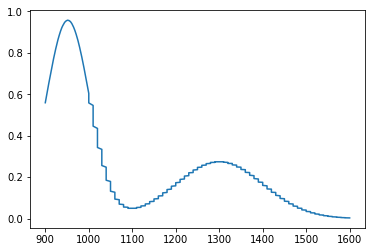

In [4]:
plt.figure()
plt.plot(nm, z)

In [5]:
peak_idx = findpeak(z, 0, 0)

peak_height, peak_fwhm = peakchar(nm, z, peak_idx)


print (peak_height)
print (peak_fwhm)

[0.957, 0.274]
[110. 240.]


In [12]:
def peak_matrix(nm_array,data_matrix,num_timeslice, threshold, mindist):
    """find peaks in a data matrix"""
    peak_idx_matx = np.zeros((num_timeslice,2))
    peak_height_matx = np.empty_like(peak_idx_matx)
    peak_fwhm_matx = np.empty_like(peak_height_matx)
    
    for i in range(num_timeslice):
        data_timeslice = data_matrix[:, i]
        
        peak_idx = findpeak(data_timeslice, threshold, mindist)
        
        peak_idx_matx[i, :] = peak_idx
        
        peak_height, peak_fwhm = peakchar(nm, data_timeslice, peak_idx)
        peak_height_matx[i, :], peak_fwhm_matx[i, :] = peak_height, peak_fwhm 
        
    return peak_idx_matx, peak_height_matx, peak_fwhm_matx

In [13]:
filename = '20180418_twogaussian_spectralshfit.txt'
nm, time, z = loaddata(filename)
num_timeslice = 3

In [14]:
peak_idx_matx, peak_height_matx, peak_fwhm_matx = peak_matrix(nm,z,num_timeslice, 0, 0)

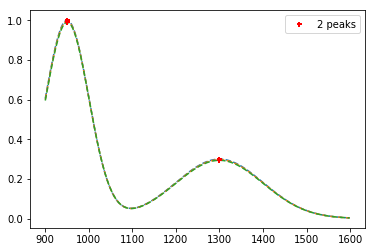

In [21]:
plt.figure()
for i in range(num_timeslice):
    #plt.plot(nm, z[:, 0:3])
    pplot(nm, z[:, i], peak_idx_matx[i, :].astype('int64'))
#pplot(x, m[:,i],peak[i,:].astype('int64'))

(3, 2)
